In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
taste = pd.read_csv('./data/train_triplets.txt', sep='\t', header=None, names=['user_id','song_id','play_count'])

In [4]:
taste.shape

(48373586, 3)

In [5]:
taste.head()

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [6]:
print "Number of unique users in the dataset is " + str(len(taste.user_id.unique()))
print "Number of unique songs in the dataset is " + str(len(taste.song_id.unique()))

Number of unique users in the dataset is 1019318
Number of unique songs in the dataset is 384546


#### Average Play counts by song and by user

In [7]:
average_play_by_song = taste.groupby('song_id')['play_count'].mean()

In [8]:
average_play_by_song.head()

song_id
SOAAADD12AB018A9DD    1.714286
SOAAADE12A6D4F80CC    1.333333
SOAAADF12A8C13DF62    1.500000
SOAAADZ12A8C1334FB    1.500000
SOAAAFI12A6D4F9C66    3.298246
Name: play_count, dtype: float64

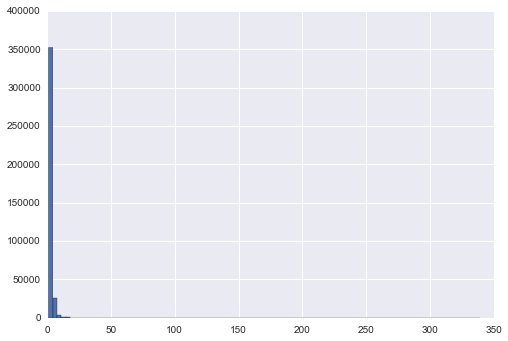

In [9]:
average_play_by_song.hist(bins=100)

In [10]:
total_play_by_song = taste.groupby('song_id')['play_count'].sum()

In [11]:
total_play_by_song.head()

song_id
SOAAADD12AB018A9DD     24
SOAAADE12A6D4F80CC     12
SOAAADF12A8C13DF62      9
SOAAADZ12A8C1334FB     12
SOAAAFI12A6D4F9C66    188
Name: play_count, dtype: int64

In [12]:
total_play_by_song.describe()

count    384546.000000
mean        360.633690
std        3256.809395
min           1.000000
25%           8.000000
50%          32.000000
75%         133.000000
max      726885.000000
Name: play_count, dtype: float64

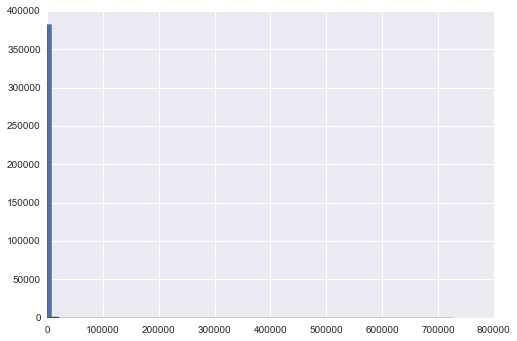

In [13]:
total_play_by_song.hist(bins=100)

In [14]:
count_play_by_song = taste.groupby('song_id')['play_count'].count()

In [15]:
count_play_by_song.head()

song_id
SOAAADD12AB018A9DD    14
SOAAADE12A6D4F80CC     9
SOAAADF12A8C13DF62     6
SOAAADZ12A8C1334FB     8
SOAAAFI12A6D4F9C66    57
Name: play_count, dtype: int64

In [16]:
count_play_by_song.describe()

count    384546.000000
mean        125.794017
std         799.025834
min           1.000000
25%           4.000000
50%          13.000000
75%          52.000000
max      110479.000000
Name: play_count, dtype: float64

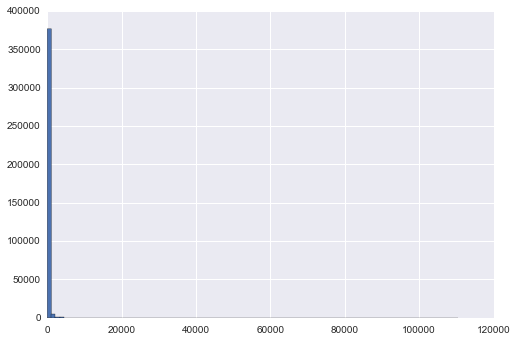

In [17]:
count_play_by_song.hist(bins=100)

In [18]:
average_play_by_user = taste.groupby('user_id')['play_count'].mean()
total_play_by_user = taste.groupby('user_id')['play_count'].sum()
count_play_by_user = taste.groupby('user_id')['play_count'].count()

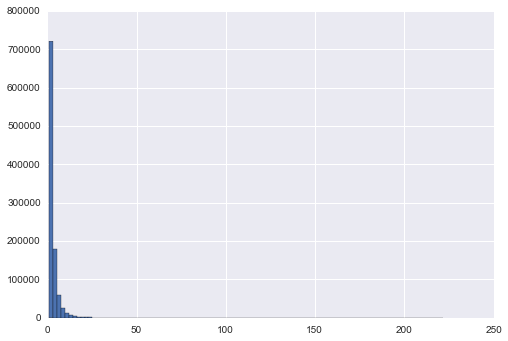

In [19]:
average_play_by_user.hist(bins=100)

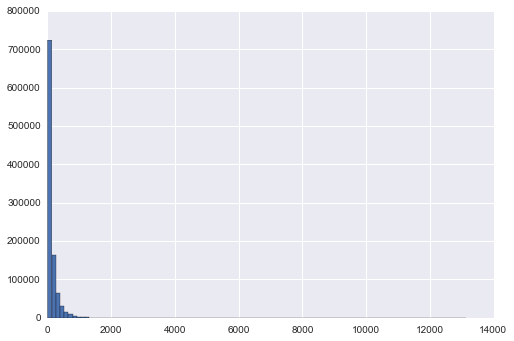

In [20]:
total_play_by_user.hist(bins=100)

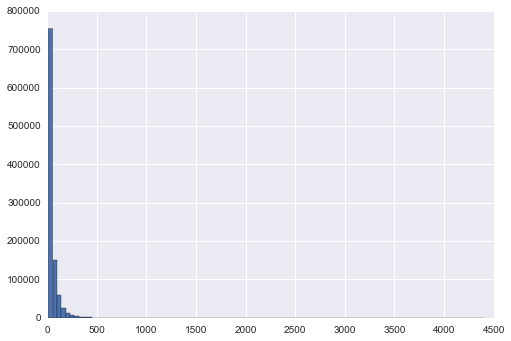

In [21]:
count_play_by_user.hist(bins=100)

In [22]:
# About 10% of user listen to more than 100 unique songs
# All users in the dataset listened to at least 10 unique songs
print len(count_play_by_user[count_play_by_user < 10]), len(count_play_by_user)
print len(count_play_by_user[count_play_by_user < 11]), len(count_play_by_user)
print len(count_play_by_user[count_play_by_user > 100]), len(count_play_by_user)
print len(count_play_by_user[count_play_by_user > 200]), len(count_play_by_user)

0 1019318
50608 1019318
110119 1019318
26062 1019318


In [23]:
#ten_k_songs = pd.read_csv('./MillionSongSubset/AdditionalFiles/subset_unique_tracks.txt',sep='<SEP>',header=None,names=)

### Load metadata

In [24]:
import sqlite3
import os

In [25]:
# path to the Million Song Dataset track meta data
track_meta_path='./data/track_metadata.db'

In [26]:
conn = sqlite3.connect(track_meta_path)

In [27]:
q = "SELECT * FROM songs limit 1"
res = conn.execute(q)

OperationalError: no such table: songs

In [33]:
res.fetchall()

[(u'TRMMMYQ128F932D901',
  u'Silent Night',
  u'SOQMMHC12AB0180CB8',
  u'Monster Ballads X-Mas',
  u'ARYZTJS1187B98C555',
  u'357ff05d-848a-44cf-b608-cb34b5701ae5',
  u'Faster Pussy cat',
  252.05506,
  0.649822100201,
  0.394031892714,
  2003,
  7032331,
  -1,
  0)]

In [34]:
q = "SELECT count(*) FROM songs"
res = conn.execute(q)
res.fetchall()

[(1000000,)]

In [35]:
count_play_by_song.head()

song_id
SOAAADD12AB018A9DD    14
SOAAADE12A6D4F80CC     9
SOAAADF12A8C13DF62     6
SOAAADZ12A8C1334FB     8
SOAAAFI12A6D4F9C66    57
Name: play_count, dtype: int64

In [36]:
q = "SELECT * FROM songs where song_id = 'SOAAAFI12A6D4F9C66'"
res = conn.execute(q)
res.fetchall()

[(u'TRZEXLQ128F1491D17',
  u'The Less You See',
  u'SOAAAFI12A6D4F9C66',
  u"I Love You But I've Chosen Darkness",
  u'ARWG6FM1187B9892B8',
  u'a9055d04-92ee-4c6c-80ac-e2ea7be06bf1',
  u"I Love You But I've Chosen Darkness",
  243.53914,
  0.634718788869,
  0.434736895201,
  2003,
  536778,
  -1,
  0)]

#### Load song information

In [28]:
df_song_info = pd.read_csv('./data/subset_song_info.csv')

In [29]:
df_song_info.shape

(10000, 22)

In [30]:
df_song_info.head()

,song_id,num_songs,song_title,artist_name,artist_familiarity,artist_hotttnesss,release,song_hotttnesss,analysis_sample_rate,duration,...,key_info,key_confidence,loudness,mode,mode_confidence,time_signature,time_signature_confidence,tempo,energy,year
0,SOMZWCG12A8C13C480,1,I Didn't Mean To,Casual,0.581794,0.401998,Fear Itself,0.602120,22050,218.93179,...,1,0.736,-11.197,0,0.636,4,0.778,92.198,0.0,0
1,SOCIWDW12A8C13D406,1,Soul Deep,The Box Tops,0.630630,0.417500,Dimensions,NaN,22050,148.03546,...,6,0.169,-9.843,0,0.430,4,0.384,121.274,0.0,1969
2,SOXVLOJ12AB0189215,1,Amor De Cabaret,Sonora Santanera,0.487357,0.343428,Las Numero 1 De La Sonora Santanera,NaN,22050,177.47546,...,8,0.643,-9.689,1,0.565,1,0.000,100.070,0.0,0
3,SONHOTT12A8C13493C,1,Something Girls,Adam Ant,0.630382,0.454231,Friend Or Foe,NaN,22050,233.40363,...,0,0.751,-9.013,1,0.749,4,0.000,119.293,0.0,1982
4,SOFSOCN12A8C143F5D,1,Face the Ashes,Gob,0.651046,0.401724,Muertos Vivos,0.604501,22050,209.60608,...,2,0.092,-4.501,1,0.371,4,0.562,129.738,0.0,2007


#### Analysis of Song information

In [32]:
df_song_info.columns

Index([u'song_id', u'num_songs', u'song_title', u'artist_name',
       u'artist_familiarity', u'artist_hotttnesss', u'release',
       u'song_hotttnesss', u'analysis_sample_rate', u'duration',
       u'danceability', u'end_of_fade_in', u'key_info', u'key_confidence',
       u'loudness', u'mode', u'mode_confidence', u'time_signature',
       u'time_signature_confidence', u'tempo', u'energy', u'year'],
      dtype='object')

In [34]:
df_song_info.artist_familiarity.describe()

count    9996.000000
mean        0.565456
std         0.160161
min         0.000000
25%         0.467611
50%         0.563666
75%         0.668020
max         1.000000
Name: artist_familiarity, dtype: float64

In [35]:
df_song_info[df_song_info['artist_familiarity']==1]

,song_id,num_songs,song_title,artist_name,artist_familiarity,artist_hotttnesss,release,song_hotttnesss,analysis_sample_rate,duration,...,key_info,key_confidence,loudness,mode,mode_confidence,time_signature,time_signature_confidence,tempo,energy,year
1870,SOIMYXI12AB018106C,1,Over The Edge,Akon,1.0,0.826777,Freedom,0.644117,22050,266.89261,...,5,0.545,-6.102,0,0.595,4,1.000,126.983,0.0,2008
4625,SOWONPQ12A8BED02A8,1,Don't Matter,Akon,1.0,0.826777,Don't Matter,0.847531,22050,249.39057,...,2,0.358,-6.124,1,0.360,4,1.000,125.328,0.0,2006
7403,SORCTMT12A58291950,1,Lonely,Akon,1.0,0.826777,Lonely,NaN,22050,211.66975,...,1,0.000,-10.870,1,0.000,4,0.148,90.069,0.0,2004
8568,SOVAJWX12AB0181448,1,Gun Shot,Akon,1.0,0.826777,Riddim Driven: Fiesta,NaN,22050,175.20281,...,0,0.432,-10.796,1,0.414,5,1.000,125.228,0.0,0


In [36]:
df_song_info.artist_hotttnesss.describe()

count    10000.000000
mean         0.385552
std          0.143647
min          0.000000
25%          0.325266
50%          0.380742
75%          0.453858
max          1.082503
Name: artist_hotttnesss, dtype: float64

In [38]:
df_song_info[df_song_info['artist_hotttnesss'] > 1]

,song_id,num_songs,song_title,artist_name,artist_familiarity,artist_hotttnesss,release,song_hotttnesss,analysis_sample_rate,duration,...,key_info,key_confidence,loudness,mode,mode_confidence,time_signature,time_signature_confidence,tempo,energy,year
74,SOCHRXB12A8AE48069,1,Let's Get It Started,Black Eyed Peas,0.845602,1.005942,Total Workout Running 102 - 135 - 84bpm Ideal ...,0.624425,22050,229.61587,...,11,0.205,-4.882,0,0.332,4,1.000,105.206,0.0,2004
1054,SOGWZBN12A6D4F6AB2,1,Through The Wire,Kanye West,0.877214,1.082503,Through The Wire,NaN,22050,271.25506,...,7,0.766,-5.227,1,0.474,4,0.785,166.037,0.0,2003
1568,SOQOXXW12AF729F20B,1,On My Own,Black Eyed Peas / Les Nubians / Mos Def,0.845602,1.005942,Bridging The Gap,NaN,22050,235.10159,...,6,0.748,-6.618,1,0.617,4,0.684,94.993,0.0,2000
2171,SOGBUUF12AB018B87E,1,Let's Get It Started,Black Eyed Peas,0.845602,1.005942,Kids Sing Along Pac,NaN,22050,223.03302,...,6,0.500,-5.939,0,0.507,4,1.000,107.199,0.0,2004
2376,SOCVLYM12A8C13A799,1,Heard 'Em Say,Kanye West / Adam Levine,0.877214,1.082503,Heard 'Em Say,NaN,22050,204.51220,...,6,0.000,-11.380,1,0.000,4,1.000,95.098,0.0,2005
2671,SOJMUAN12AB0183911,1,Street Lights,Kanye West,0.877214,1.082503,808s & Heartbreak,0.814517,22050,189.96200,...,1,0.580,-9.644,1,0.567,3,0.432,125.593,0.0,2008
2904,SOYGIBP12A67020AF7,1,Magic,Black Eyed Peas / Terry Dexter,0.845602,1.005942,Legally Blonde,0.508602,22050,275.04281,...,7,0.094,-3.574,0,0.182,4,0.996,103.652,0.0,2000
4950,SONJBQX12A6D4F8382,1,Da Funk,Daft Punk,0.902841,1.021256,Homework,0.862255,22050,329.53424,...,5,0.055,-5.019,0,0.419,4,1.000,111.201,0.0,1995
4989,SOJKTJG12AB0182516,1,Touch The Sky,Kanye West / Lupe Fiasco,0.877214,1.082503,Touch The Sky,NaN,22050,236.72118,...,9,0.000,-5.263,1,0.072,4,1.000,106.825,0.0,2010
6779,SORUAXY12A67020A4B,1,Gone,Kanye West / Consequence / Cam'Ron,0.877214,1.082503,Late Registration,NaN,22050,333.34812,...,10,0.693,-6.029,0,0.559,4,1.000,114.390,0.0,2005


In [39]:
df_song_info.danceability.describe()

count    10000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: danceability, dtype: float64

In [40]:
df_song_info.duration.describe()

count    10000.000000
mean       238.507518
std        114.137514
min          1.044440
25%        176.032200
50%        223.059140
75%        276.375060
max       1819.767710
Name: duration, dtype: float64

In [41]:
df_song_info[df_song_info['duration'] > 1000]

,song_id,num_songs,song_title,artist_name,artist_familiarity,artist_hotttnesss,release,song_hotttnesss,analysis_sample_rate,duration,...,key_info,key_confidence,loudness,mode,mode_confidence,time_signature,time_signature_confidence,tempo,energy,year
474,SOGJYZW12A8C134DBD,1,Crass Commercialism,Black Flag,0.731208,0.547507,Everything Went Black,0.499446,22050,1030.19057,...,0,0.587,-18.910,1,0.655,5,0.990,70.649,0.0,1982
1065,SOBGEIG12A6D4F6635,1,Raga Anandi Kalyan (Alap_ jor and jhala),Kartik Seshadri,0.434022,0.411651,Illuminations,0.000000,22050,1519.28118,...,1,0.909,-23.684,1,0.805,3,0.536,88.329,0.0,0
1281,SOHODRU12A81C230CE,1,Genuine,Five Fingers of Funk,0.383074,0.000000,About Time,0.000000,22050,1400.37179,...,0,0.124,-8.792,1,0.256,0,0.000,0.000,0.0,1998
1570,SONNXDI12AB0186816,1,Ego is the drug/3am,The Frequency,0.568427,0.335042,Morning to 3am,0.000000,22050,1054.37995,...,9,1.000,-11.906,1,0.825,4,0.873,246.500,0.0,0
1606,SOIQQIX12AB018827D,1,Live At Brixton Academy 1999,Atari Teenage Riot,0.686812,0.443876,Live at Brixton Academy 1999,0.392009,22050,1598.19710,...,10,0.152,-7.638,1,0.000,7,0.825,74.384,0.0,2000
1642,SOLQMCQ12AB018E469,1,Mar gaye te sada naal,Naseebo Lal_ Arif Lohar,0.363476,0.000000,Taqdeer Dee Pencil,NaN,22050,1037.68771,...,11,0.623,-11.368,0,0.530,4,0.749,147.347,0.0,0
1903,SOYORWN12A8C144436,1,Happiness Stan - Original,Small Facers,0.582238,0.449053,The Very Best Of CD2,0.000000,22050,1141.08036,...,2,0.832,-18.626,1,0.772,5,0.508,70.163,0.0,0
1962,SOFNNDS12A8C138268,1,Variations Sur Un Theme De Haydn Op51,Herbert Von Karajan,0.668056,0.464152,Violin Concerto_ Op.77 Etc.,NaN,22050,1143.03955,...,10,0.939,-20.536,1,0.515,5,0.685,171.780,0.0,0
2069,SOFPDFR12A8C136ACA,1,Subliminal mit Naturgeraeuschen,Kurt Tepperwein,0.311753,0.252081,Kaufen lassen - Beziehungs-Management,NaN,22050,1222.42567,...,8,0.888,-21.036,0,0.565,3,0.723,145.259,0.0,0
3352,SOLBAJZ12AB01840B0,1,911-544,The Revolutionary Ensemble,0.351037,0.301673,And Now...,NaN,22050,1253.92934,...,2,0.370,-11.973,0,0.420,4,0.830,74.183,0.0,0


In [42]:
df_song_info.end_of_fade_in.describe()

count    10000.000000
mean         0.758616
std          1.867952
min          0.000000
25%          0.000000
50%          0.199000
75%          0.421000
max         43.119000
Name: end_of_fade_in, dtype: float64

In [43]:
df_song_info[df_song_info['end_of_fade_in'] > 40]

,song_id,num_songs,song_title,artist_name,artist_familiarity,artist_hotttnesss,release,song_hotttnesss,analysis_sample_rate,duration,...,key_info,key_confidence,loudness,mode,mode_confidence,time_signature,time_signature_confidence,tempo,energy,year
7043,SOANBYB12A58A7F0C5,1,Arrete! Arrete! Elle me tue,Francis Dhomont,0.444372,0.295333,Sous le regard d'un soleil noir,NaN,22050,445.30893,...,11,0.758,-19.36,1,0.719,3,0.875,88.446,0.0,0


In [44]:
df_song_info.key_info.describe()

count    10000.000000
mean         5.276100
std          3.554087
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: key_info, dtype: float64

In [45]:
df_song_info.key_info.value_counts()

7     1339
0     1213
2     1129
9     1040
1      821
4      810
5      795
11     738
10     700
6      577
8      528
3      310
Name: key_info, dtype: int64

In [46]:
df_song_info.loudness.describe()

count    10000.000000
mean       -10.485668
std          5.399788
min        -51.643000
25%        -13.163250
50%         -9.380000
75%         -6.532500
max          0.566000
Name: loudness, dtype: float64

In [49]:
df_song_info['mode'].value_counts()

1    6911
0    3089
Name: mode, dtype: int64

In [50]:
df_song_info.mode_confidence.describe()

count    10000.000000
mean         0.477784
std          0.191254
min          0.000000
25%          0.360000
50%          0.487000
75%          0.606000
max          1.000000
Name: mode_confidence, dtype: float64

In [51]:
df_song_info[df_song_info.mode_confidence==1]

,song_id,num_songs,song_title,artist_name,artist_familiarity,artist_hotttnesss,release,song_hotttnesss,analysis_sample_rate,duration,...,key_info,key_confidence,loudness,mode,mode_confidence,time_signature,time_signature_confidence,tempo,energy,year
133,SOPWKSS12AC468E659,1,Cowboy Ways,James Hunter,0.625443,0.431527,A Tribute to The American Horse,NaN,22050,188.73424,...,2,0.862,-7.040,1,1.0,4,0.000,114.971,0.0,0
726,SOIUCMV12AB017DEDB,1,Mais La Vie,Maurane / Lara Fabian,0.580481,0.412611,Quand L'Humain Danse,0.225768,22050,198.86975,...,0,0.588,-13.637,0,1.0,4,0.961,107.087,0.0,2003
927,SOBZHRL12A6D4F6A70,1,Away In A Manger,Lara & Reyes,0.338956,0.351561,Navidad,0.235615,22050,92.70812,...,7,1.000,-14.919,1,1.0,1,0.000,111.727,0.0,2000
1359,SOVTGRO12AC4686C43,1,Air: My Lagan Love,Willie Clancy,0.346237,0.284824,Willie Clancy The Gold Ring,NaN,22050,166.92200,...,7,1.000,-11.477,1,1.0,1,0.530,106.542,0.0,0
1556,SOISGJD12A8C144775,1,La Piel de Tu Alma,Tito Rodriguez_ Louie Ramirez,0.412867,0.238696,"En ""Algo Nuevo",0.000000,22050,244.27057,...,8,0.529,-16.375,1,1.0,4,0.141,162.984,0.0,0
1713,SOJEWUE12A8C1437CD,1,Mrs Scott Skinner / Mackenzie Hay / The Devil'...,James Scott Skinner,0.247485,0.000000,The Strathspey King,NaN,22050,149.23710,...,2,1.000,-21.630,1,1.0,4,0.087,152.363,0.0,0
1717,SOIZDTU12AB01840C5,1,Soul Of A Man,Erja Lyytinen,0.506902,0.348737,Voracious Love,0.405116,22050,111.80363,...,7,1.000,-13.411,1,1.0,4,0.774,91.760,0.0,2010
2433,SOGHGOM12A67ADC18F,1,Roll Back The Clouds,Christie Hennessy,0.413960,0.316549,The Platinum Collection,NaN,22050,332.69506,...,9,1.000,-15.673,1,1.0,4,0.892,126.488,0.0,0
3314,SOWPUQN12A6D4F8821,1,Falling Leaves,Grandpa Jones,0.450646,0.331535,Country Music Hall Of Fame Series: Grandpa Jones,0.378686,22050,158.71955,...,9,1.000,-11.145,1,1.0,1,0.000,65.930,0.0,1995
4694,SONUMRQ12AB017E917,1,Somewhere In Time,Dave Alvin,0.556721,0.415825,Ashgrove,0.375984,22050,354.19383,...,0,1.000,-15.241,1,1.0,4,0.415,121.171,0.0,0


In [52]:
df_song_info.time_signature.value_counts()

4    6351
1    1498
3    1278
5     589
7     281
0       3
Name: time_signature, dtype: int64

In [53]:
df_song_info.tempo.describe()

count    10000.000000
mean       122.915449
std         35.184412
min          0.000000
25%         96.965750
50%        120.161000
75%        144.013250
max        262.828000
Name: tempo, dtype: float64

In [54]:
df_song_info.energy.describe()

count    10000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: energy, dtype: float64

In [55]:
df_song_info.year.value_counts()

0       5320
2006     320
2005     304
2007     285
2004     270
2003     254
2008     253
2009     250
2001     217
2002     198
2000     192
1999     178
1998     151
1995     135
1997     130
1993     126
1994     115
1996     109
1992      98
1991      91
1990      72
1989      66
2010      64
1988      61
1982      50
1983      47
1987      44
1986      37
1979      36
1981      36
        ... 
1968      23
1974      22
1970      21
1978      20
1969      17
1963      15
1976      15
1964      13
1966      12
1959       9
1960       9
1965       8
1956       7
1961       7
1958       6
1953       4
1962       4
1927       3
1930       2
1935       2
1926       2
1947       2
1940       2
1954       1
1950       1
1929       1
1934       1
1955       1
1936       1
1957       1
Name: year, dtype: int64

In [56]:
taste.shape

(48373586, 3)

In [57]:
taste.columns

Index([u'user_id', u'song_id', u'play_count'], dtype='object')

### Merge taste profile and song info

In [58]:
song_taste = pd.merge(taste, df_song_info, how='inner', on='song_id')

In [59]:
song_taste.shape

(772661, 24)

In [60]:
song_taste.head()

,user_id,song_id,play_count,num_songs,song_title,artist_name,artist_familiarity,artist_hotttnesss,release,song_hotttnesss,...,key_info,key_confidence,loudness,mode,mode_confidence,time_signature,time_signature_confidence,tempo,energy,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1,1,Tu Quieres Volver,Gipsy Kings,0.710446,0.540631,Greatest Hits,0.778821,...,5,0.351,-8.403,0,0.318,1,0.034,165.006,0.0,1987
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,2,1,Tu Quieres Volver,Gipsy Kings,0.710446,0.540631,Greatest Hits,0.778821,...,5,0.351,-8.403,0,0.318,1,0.034,165.006,0.0,1987
2,d6c5bd2b570b4faf8964d7ed04f3392ff505d2be,SOWEZSI12A81C21CE6,1,1,Tu Quieres Volver,Gipsy Kings,0.710446,0.540631,Greatest Hits,0.778821,...,5,0.351,-8.403,0,0.318,1,0.034,165.006,0.0,1987
3,724534729c9f5dc72a009269c2c225883e4775d2,SOWEZSI12A81C21CE6,1,1,Tu Quieres Volver,Gipsy Kings,0.710446,0.540631,Greatest Hits,0.778821,...,5,0.351,-8.403,0,0.318,1,0.034,165.006,0.0,1987
4,ee7aa84c164038c963cfd02a7e52a5598aa470c3,SOWEZSI12A81C21CE6,2,1,Tu Quieres Volver,Gipsy Kings,0.710446,0.540631,Greatest Hits,0.778821,...,5,0.351,-8.403,0,0.318,1,0.034,165.006,0.0,1987


In [62]:
len(song_taste.user_id.unique()), len(song_taste.song_id.unique())

(418252, 3675)

In [63]:
song_taste.to_csv('./data/subset_song_taste.csv', index=False)